In [2]:
import pandas as pd
import seaborn as sns
import sqlite3
import matplotlib.pyplot as plt
from huggingface_hub import hf_hub_download

/Users/user/IUBH/Semester6/Bachlorthesis/code/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Total entries in 'paper' table: 21748


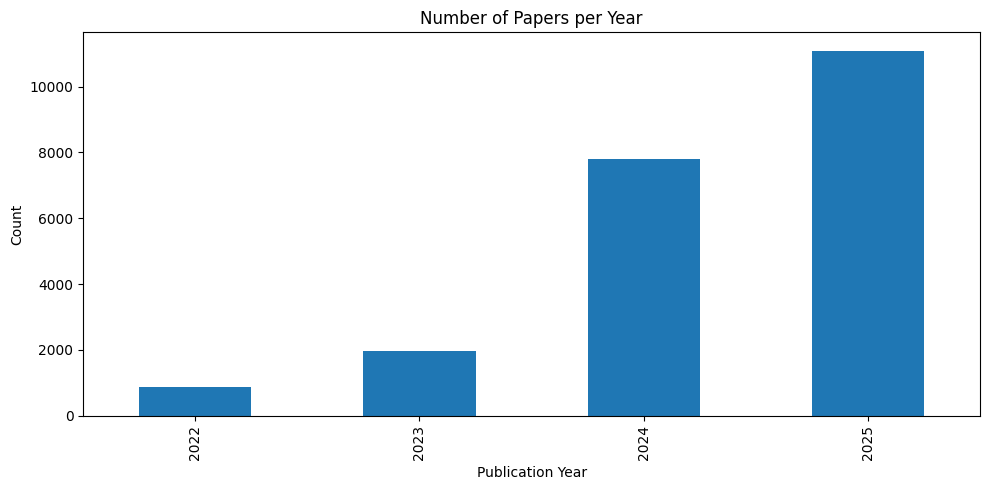

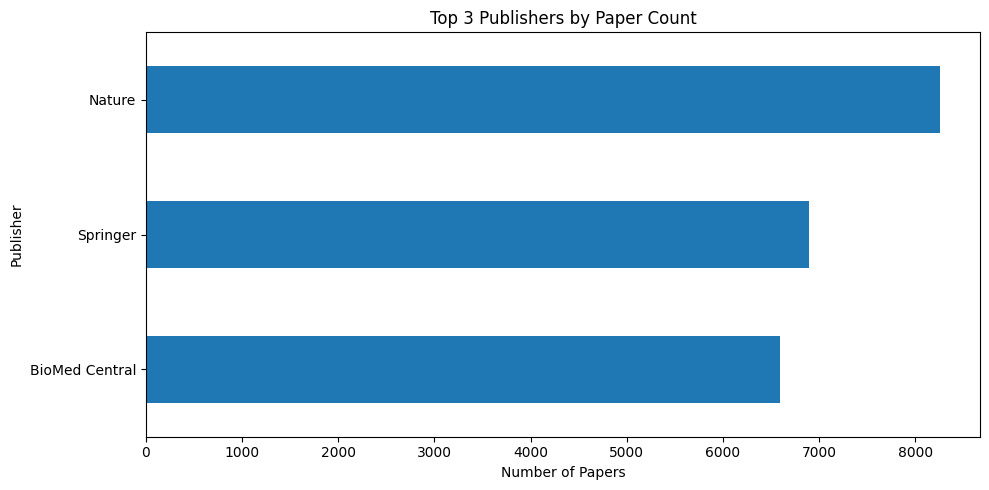

In [5]:
# check how many papers were extracted from API
#%% Download the papers.db file from Hugging Face


db_path = hf_hub_download(
    repo_id="sthoran/aidrugcorpus",
    filename="papers.db",
    repo_type="dataset"
)
#%%
con = sqlite3.connect(db_path)
cursor = con.cursor()
con = sqlite3.connect(db_path)
cur = con.cursor()


cur.execute("SELECT COUNT(*) FROM paper;")
count = cur.fetchone()[0]

print(f"Total entries in 'paper' table: {count}")

# Load relevant columns into a DataFrame
df = pd.read_sql_query("SELECT publicationDate, publisher FROM paper", con)
con.close()
df['published'] = pd.to_datetime(df['publicationDate'], errors='coerce')

# Drop rows with missing or invalid dates
df = df.dropna(subset=['publicationDate'])

#Publication timeline histogram 
plt.figure(figsize=(10, 5))
df['published'].dt.year.value_counts().sort_index().plot(kind='bar')
plt.title('Number of Papers per Year')
plt.xlabel('Publication Year')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Top Publishers 
top_publishers = df['publisher'].value_counts().nlargest(10)

plt.figure(figsize=(10, 5))
top_publishers.plot(kind='barh')
plt.title('Top 3 Publishers by Paper Count')
plt.xlabel('Number of Papers')
plt.ylabel('Publisher')
plt.gca().invert_yaxis()  # Largest at the top
plt.tight_layout()
plt.show()




In [7]:
# check the filtered AI subcorpus
csv_path = hf_hub_download(
    repo_id="sthoran/aidrugcorpus",
    filename="filtered_ai_abstracts.cvs",
    repo_type="dataset"
)
df = pd.read_csv(csv_path)
df.head()

,doi,title,subjects,disciplines,publisher,abstract,language,publicationDate,text,AI_method_text
0,10.1038/s41388-024-03252-5,A TBX2-driven signaling switch from androgen r...,"Medicine & Public Health, Medicine/Public Heal...","Public Health, Internal Medicine, Cell Biology...",Nature,Recent studies suggest that glucocorticoid rec...,en,2025-04-14,a tbx2-driven signaling switch from androgen r...,pca
1,10.1038/s41598-025-96512-7,Noise robust aircraft trajectory prediction vi...,"Science, Humanities and Social Sciences, multi...","Technology and Engineering, Physical Sciences,...",Nature,Aircraft trajectory prediction is vital for en...,en,2025-04-03,noise robust aircraft trajectory prediction vi...,transformer
2,10.1007/s11128-025-04725-6,A Laplacian-based quantum graph neural network...,"Physics, Quantum Information Technology, Spint...","Spintronics, Quantum Computing, Data Structure...",Springer,The Laplacian learning method has proven effec...,en,2025-04-03,a laplacian-based quantum graph neural network...,neural network
3,10.1186/s12933-025-02711-x,Improved prediction and risk stratification of...,"Medicine & Public Health, Diabetes, Angiology,...","Diseases, Angiology, Cardiology",BioMed Central,"Background, Cardiovascular diseases (CVD) rema...",en,2025-04-02,improved prediction and risk stratification of...,catboost
4,10.1007/s00424-024-03033-9,Causality and scientific explanation of artifi...,"Biomedicine, Human Physiology, Molecular Medic...","Human Physiology, Biomedical Research, Neurosc...",Springer,With rapid advances of deep neural networks ov...,en,2025-04-01,causality and scientific explanation of artifi...,neural network


In [8]:
df.describe()

,doi,title,subjects,disciplines,publisher,abstract,language,publicationDate,text,AI_method_text
count,2252,2252,2252,2252,2252,2252,2252,2252,2252,2252
unique,2252,2252,413,424,3,2252,1,730,2252,72
top,10.1038/s41388-024-03252-5,A TBX2-driven signaling switch from androgen r...,"Science, Humanities and Social Sciences, multi...","Technology and Engineering, Physical Sciences,...",Nature,Recent studies suggest that glucocorticoid rec...,en,2025-02-01,a tbx2-driven signaling switch from androgen r...,neural network
freq,1,1,617,483,850,1,2252,27,1,739


In [9]:
df['publisher'].unique()

array(['Nature', 'Springer', 'BioMed Central'], dtype=object)

In [10]:
df['AI_method_text'].unique()

array([' pca ', 'transformer', 'neural network', 'catboost', ' ae ',
       'active learning', 'gradient boosting', 'logistic regression',
       'linear regression', 'random forest', 'svm',
       'support vector machine', 'diffusion model', 'reinforce',
       'multi-layer perceptron', 'xgboost', 'transfer learning',
       'decision tree', ' cnn ', 'long short-term memory',
       'lasso regression', 'lightgbm', 'autoencoder', 'ridge regression',
       'k-means', ' bert ', 'efficientnet', 'adaboost', ' mlp ',
       'few-shot learning', 'generative adversarial network', ' gpt ',
       'graph convolutional network', 'federated learning', 'resnet',
       'self-supervised learning', 'u-net', 'zero-shot learning', 'lstm',
       'hierarchical clustering', ' mcts ', ' gat ',
       'gated recurrent unit', 'graph isomorphism network',
       'gaussian process', 't-sne', 'multi-task learning', 'performer',
       'graph attention network', ' umap ', 'roberta',
       'contrastive learni

In [11]:
# check abbrevations like 'gan', 'gpt', if they are really machine leanring methods and not biomedical abbravations, short is 5 characters
short_ai_method = df[df['AI_method_text'].str.len().between(2,5) ].reset_index(drop=True)

In [43]:
short_ai_method

,doi,title,subjects,disciplines,publisher,abstract,language,publicationDate,text,AI_method_text
0,10.1038/s41388-024-03252-5,A TBX2-driven signaling switch from androgen r...,"Medicine & Public Health, Medicine/Public Heal...","Public Health, Internal Medicine, Cell Biology...",Nature,Recent studies suggest that glucocorticoid rec...,en,2025-04-14,a tbx2-driven signaling switch from androgen r...,pca
1,10.1007/s40264-024-01509-2,Clinical Relatedness and Stability of vigiVec ...,"Medicine & Public Health, Drug Safety and Phar...","Drug Safety and Pharmacovigilance, Pharmacology",Springer,"Introduction, Individual case reports are esse...",en,2025-04-01,clinical relatedness and stability of vigivec ...,ae
2,10.1038/s41467-025-58569-w,Integrated proteogenomic characterization of l...,"Science, Humanities and Social Sciences, multi...",Humanities and Social Sciences,Nature,Localized prostate cancer (PCa) is highly vari...,en,2025-04-03,integrated proteogenomic characterization of l...,pca
3,10.1007/s42979-025-03860-2,A Survey on Machine Learning Techniques for He...,"Computer Science, Computer Science, general, C...","Computer Science, Computer Engineering and Net...",Springer,Machine learning is the field of data science ...,en,2025-04-01,a survey on machine learning techniques for he...,svm
4,10.1007/s10489-025-06259-x,Unveiling the frontiers of deep learning: Inno...,"Computer Science, Artificial Intelligence, Mec...","Artificial Intelligence, Mechanical Engineerin...",Springer,Deep learning (DL) allows computer models to l...,en,2025-03-25,unveiling the frontiers of deep learning: inno...,cnn
...,...,...,...,...,...,...,...,...,...,...
176,10.1186/s12645-025-00305-6,Electroporation assisted delivery of Roussin s...,"Materials Science, Nanotechnology, Cancer Rese...","Nanotechnology, Cancer Biology, Biomedical Eng...",BioMed Central,"Background, In the realm of cancer treatment, ...",en,2025-01-20,electroporation assisted delivery of roussin s...,pca
177,10.1007/s00415-023-12051-z,Cerebral glucose hypometabolism and hypoperfus...,"Medicine & Public Health, Neurology, Neuroscie...","Neurology, Neuroscience, Neuroradiology",Springer,"Background, About 60% of autoimmune encephalit...",en,2024-03-01,cerebral glucose hypometabolism and hypoperfus...,ae
178,10.1038/s41598-024-54806-2,Transcriptomic changes in barley leaves induce...,"Science, Humanities and Social Sciences, multi...","Technology and Engineering, Physical Sciences,...",Nature,Hardly anything is known regarding the detoxif...,en,2024-02-24,transcriptomic changes in barley leaves induce...,ae
179,10.1007/s12072-022-10321-y,Deep learning for prediction of hepatocellular...,"Medicine & Public Health, Hepatology, Colorect...","Internal Medicine, Colorectal Surgery, Surgery",Springer,"Background, There is a growing need for new im...",en,2022-06-01,deep learning for prediction of hepatocellular...,u-net


In [44]:
import re
# mark the part in the text that includes 
def mark_ai_method_ci(row):
    method = row['AI_method_text']
    text = row['text']
    
    if pd.isna(method) or pd.isna(text):
        return text

    # Search case-insensitively and replace with highlighted version
    pattern = re.compile(re.escape(method), re.IGNORECASE)
    return pattern.sub(f"**{method}**", text)

short_ai_method['text_marked'] = short_ai_method.apply(mark_ai_method_ci, axis=1)


In [ ]:
#short_ai_method.to_csv('check_ai_abbr.csv')

In [14]:
# check manually if the abbrevation is in AI context, then add the index in a list for entries that do not match

unsuitable_entries = [0,1,2,5,6,12,15,18,28,29,36,37,47,54,56,57,58,62,66,67,69,71,75,76,78,87,90,91,
                      93,94,102,117,120,123,125,127,131,132,133,141,142,148,151,153,154,155,158,159,
                      161,164,167,168,178,179]

In [15]:
len(unsuitable_entries)

54

In [16]:
# Remove unsuitable entries from short_ai_method
csv_path1 = hf_hub_download(
    repo_id="sthoran/aidrugcorpus",
    filename="check_ai_abbr.csv",
    repo_type="dataset"
)
short_ai_method = pd.read_csv(csv_path1)
unsuitable_dois = short_ai_method.loc[unsuitable_entries, 'doi'].dropna().unique()
unsuitable_dois

array(['10.1038/s41388-024-03252-5', '10.1007/s40264-024-01509-2',
       '10.1038/s41467-025-58569-w', '10.1186/s12951-025-03326-w',
       '10.1038/s41598-025-95250-0', '10.1007/s00280-025-04775-8',
       '10.1186/s12911-025-02923-x', '10.1186/s12967-025-06180-4',
       '10.1038/s41598-024-84842-x', '10.1007/s12031-025-02332-9',
       '10.1186/s12859-024-05999-w', '10.1186/s10020-024-01024-1',
       '10.1007/s12672-025-02083-4', '10.1038/s41598-024-70618-w',
       '10.1186/s40538-025-00751-9', '10.1186/s12888-024-06272-3',
       '10.1186/s12967-025-06271-2', '10.1186/s12888-024-05950-6',
       '10.1186/s12894-024-01521-9', '10.1007/s12672-025-01878-9',
       '10.1186/s12884-024-06914-0', '10.1007/s41348-024-00896-z',
       '10.1038/s41467-024-48453-4', '10.1038/s41598-024-62278-7',
       '10.1038/s41598-024-61124-0', '10.1186/s12911-024-02512-4',
       '10.1038/s41598-024-59578-3', '10.1007/s11467-024-1394-7',
       '10.1186/s41747-024-00519-0', '10.1038/s41598-024-75275-

In [48]:
 #Filter df to remove entries with unsuitable DOIs
df_cleaned = df[~df['doi'].isin(unsuitable_dois)].reset_index(drop=True)

In [62]:
df_cleaned.describe()

,doi,title,subjects,disciplines,publisher,abstract,language,publicationDate,text,AI_method_text
count,2198,2198,2198,2198,2198,2198,2198,2198,2198,2198
unique,2198,2198,404,414,3,2198,1,725,2198,70
top,10.1038/s41598-025-96512-7,Noise robust aircraft trajectory prediction vi...,"Science, Humanities and Social Sciences, multi...","Technology and Engineering, Physical Sciences,...",Nature,Aircraft trajectory prediction is vital for en...,en,2025-02-01,noise robust aircraft trajectory prediction vi...,neural network
freq,1,1,600,468,830,1,2198,27,1,739


In [63]:
df_cleaned.to_csv('raw_dataset.csv')

In [49]:
df_cleaned

,doi,title,subjects,disciplines,publisher,abstract,language,publicationDate,text,AI_method_text
0,10.1038/s41598-025-96512-7,Noise robust aircraft trajectory prediction vi...,"Science, Humanities and Social Sciences, multi...","Technology and Engineering, Physical Sciences,...",Nature,Aircraft trajectory prediction is vital for en...,en,2025-04-03,noise robust aircraft trajectory prediction vi...,transformer
1,10.1007/s11128-025-04725-6,A Laplacian-based quantum graph neural network...,"Physics, Quantum Information Technology, Spint...","Spintronics, Quantum Computing, Data Structure...",Springer,The Laplacian learning method has proven effec...,en,2025-04-03,a laplacian-based quantum graph neural network...,neural network
2,10.1186/s12933-025-02711-x,Improved prediction and risk stratification of...,"Medicine & Public Health, Diabetes, Angiology,...","Diseases, Angiology, Cardiology",BioMed Central,"Background, Cardiovascular diseases (CVD) rema...",en,2025-04-02,improved prediction and risk stratification of...,catboost
3,10.1007/s00424-024-03033-9,Causality and scientific explanation of artifi...,"Biomedicine, Human Physiology, Molecular Medic...","Human Physiology, Biomedical Research, Neurosc...",Springer,With rapid advances of deep neural networks ov...,en,2025-04-01,causality and scientific explanation of artifi...,neural network
4,10.1007/s10844-024-00902-8,Classifying the content of online notepad serv...,"Computer Science, Information Storage and Retr...","Information Storage and Retrieval, Data Struct...",Springer,Pastebin is an online notepad service to share...,en,2025-04-01,classifying the content of online notepad serv...,active learning
...,...,...,...,...,...,...,...,...,...,...
2193,10.1038/s41467-022-29525-9,Using deep learning to predict abdominal age f...,"Science, Humanities and Social Sciences, multi...",Humanities and Social Sciences,Nature,"With age, the prevalence of diseases such as f...",en,2022-04-13,using deep learning to predict abdominal age f...,neural network
2194,10.1186/s12859-022-04655-5,HGDTI: predicting drug–target interaction by u...,"Life Sciences, Bioinformatics, Microarrays, Co...","Bioinformatics, Computational and Systems Biol...",BioMed Central,"Background, In research on new drug discovery,...",en,2022-04-12,hgdti: predicting drug–target interaction by u...,neural network
2195,10.1038/s41746-022-00577-x,A high-generalizability machine learning frame...,"Medicine & Public Health, Medicine/Public Heal...","Medical and Health Technologies, Health Scienc...",Nature,Alzheimer’s disease is a neurodegenerative dis...,en,2022-04-12,a high-generalizability machine learning frame...,neural network
2196,10.1186/s12859-022-04660-8,Towards a robust out-of-the-box neural network...,"Life Sciences, Bioinformatics, Microarrays, Co...","Bioinformatics, Computational and Systems Biol...",BioMed Central,"Background, The accurate prediction of biologi...",en,2022-04-09,towards a robust out-of-the-box neural network...,neural network


In [50]:
df_cleaned['publicationDate'] = pd.to_datetime(df_cleaned['publicationDate'], errors='coerce')

df_cleaned = df_cleaned.dropna(subset=['publicationDate'])  # Drop rows with invalid dates


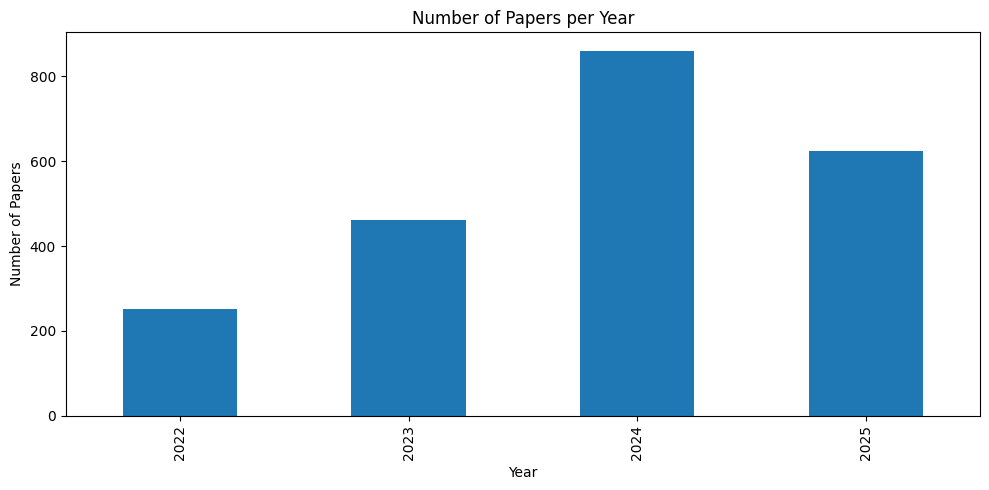

In [51]:
plt.figure(figsize=(10, 5))
df_cleaned['publicationDate'].dt.year.value_counts().sort_index().plot(kind='bar')
plt.title('Number of Papers per Year')
plt.xlabel('Year')
plt.ylabel('Number of Papers')
plt.tight_layout()
plt.show()

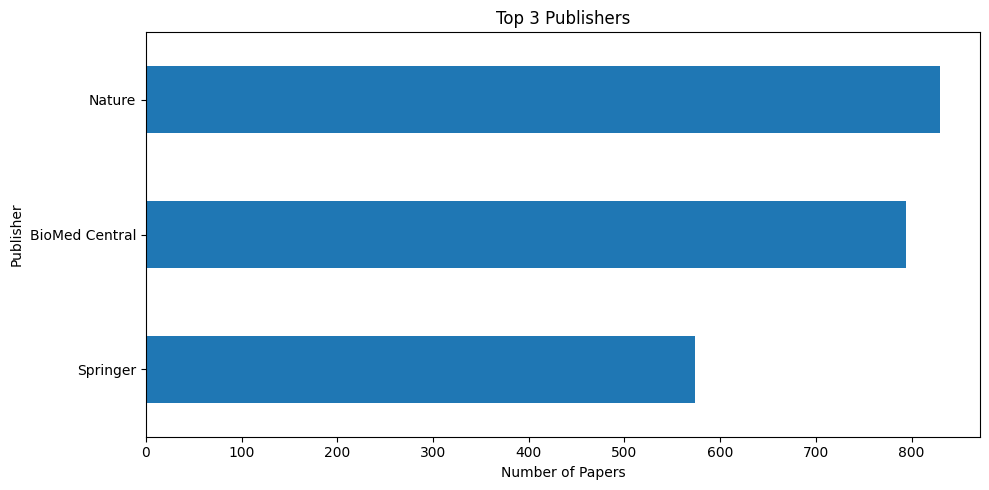

In [56]:
top_publishers = df_cleaned['publisher'].value_counts().nlargest(10)

plt.figure(figsize=(10, 5))
top_publishers.plot(kind='barh')
plt.title('Top 3 Publishers')
plt.xlabel('Number of Papers')
plt.ylabel('Publisher')
plt.gca().invert_yaxis()  # Most frequent on top
plt.tight_layout()
plt.show()
